In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (15,10)

/home/indix/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Reading the data
Lets read some of Indix's spot checked data using pandas. The data will have different fields of a product and each field will have a corresponding spot checked field with *_status* appending to its name.

In [2]:
spot_check_data = pd.read_csv("spot_check_data.csv.bz2")

/home/indix/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,49,50,52,53,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,72,73,74,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# How many words are present in each title? 
Also analyse the distribution of number of words in title.

In [3]:
# lets see all the columns available first.
spot_check_data.columns

Index([u'Unnamed: 0', u'id', u'job_id', u't_created', u't_info', u'tr_created',
       u'tr_info', u'start_time', u'finish_time', u'additionalAttributes',
       u'availability', u'brandName', u'brandText', u'breadCrumbs',
       u'categoryNamePath', u'currency', u'description', u'imageUrl',
       u'listPrice', u'mpns', u'productUrl', u'salePrice', u'seller', u'sku',
       u'storeId', u'storeName', u'title', u'upcs', u'url',
       u'variantAttributes', u'WrongURL', u'additionalAttributes_status',
       u'availability_status', u'brandName_status', u'brandText_status',
       u'breadCrumbs_status', u'categoryNamePath_status', u'comments',
       u'currency_status', u'description_status', u'imageUrl_status',
       u'listPrice_status', u'mpns_status', u'salePrice_status', u'sku_status',
       u'title_status', u'upcs_status', u'variantAttributes_status',
       u'variantCOLOR_status', u'variantColoe_status',
       u'variantColorCode_status', u'variantColor_status',
       u'variantCo

In [4]:
# The column we need for this question is 'title'. So, let's set take that out and peek into it.
# I am intending to modify the data and add few columns etc. 
# So, I am copying instead of just setting 'titles' to the view of 'title' column.
titles = spot_check_data[['title']].copy()
titles.columns

Index([u'title'], dtype='object')

In [5]:
titles.describe()

,title
count,8481
unique,5226
top,Bowflex® Machine Mats
freq,42


In [6]:
titles.dropna().describe()

,title
count,8481
unique,5226
top,Bowflex® Machine Mats
freq,42


In [7]:
# We can use split() function to get the number of words in the title. The split() function will split by space
# and filter the empty strings.

titles.iloc[0, 0].split()

['Nike',
 'NFL',
 'Dri-Fit',
 'Fly',
 'XL',
 '3.0',
 'Shorts',
 '-',
 "Men's",
 'New',
 'England',
 'Patriots']

In [8]:
# now to do the above on all the rows, we can use apply function along with a lambda fn.
titles['word_count'] = titles['title'].apply(lambda title : len(title.split()))
titles.describe()

,word_count
count,8481.000000
mean,7.123217
std,5.217783
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,186.000000


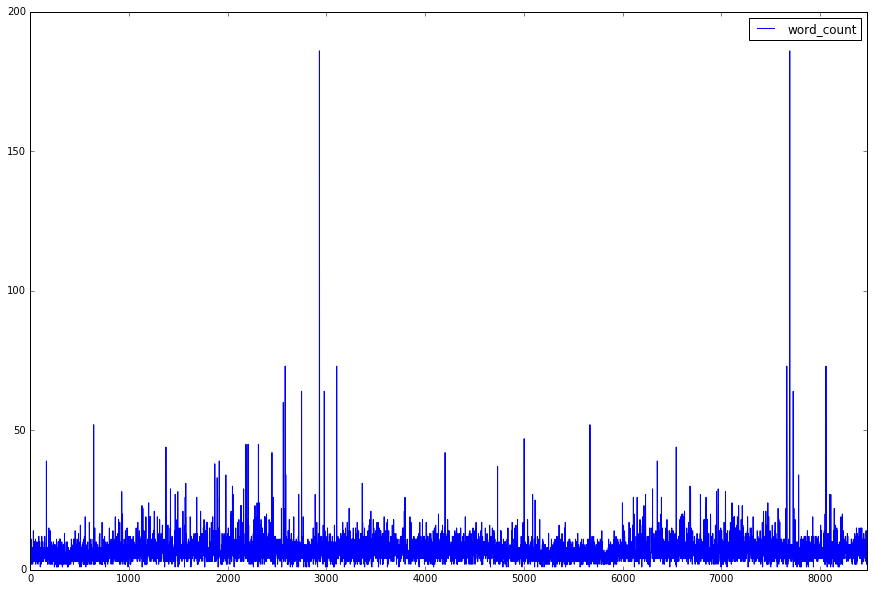

In [9]:
titles.plot()

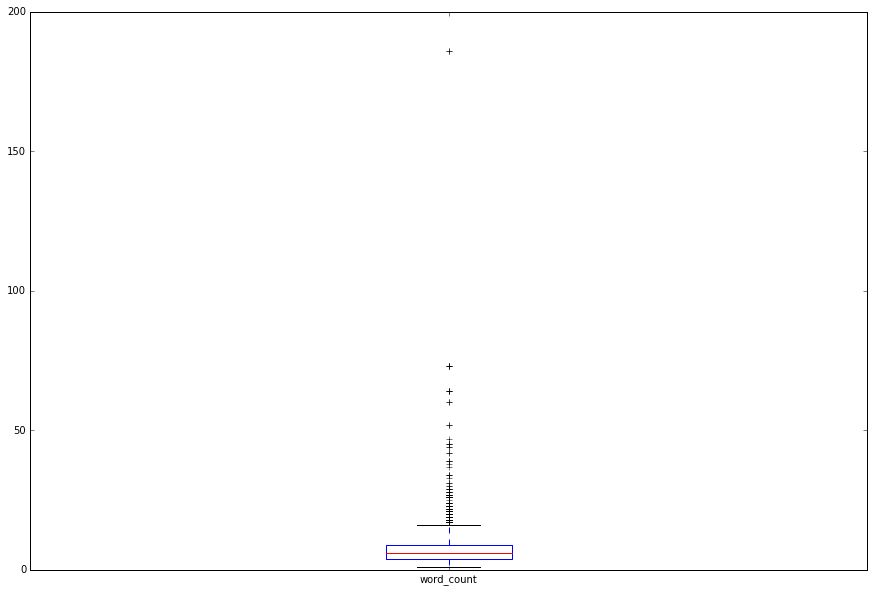

In [10]:
titles.plot.box()

# How many words are present in breadcrumbs? 
Analyse the distribution of number of words in breadcrumbs.

In [11]:
breadcrumbs = spot_check_data[['breadCrumbs']].copy()
breadcrumbs.columns

Index([u'breadCrumbs'], dtype='object')

In [12]:
breadcrumbs = breadcrumbs.fillna('')

In [13]:
breadcrumbs.head()

,breadCrumbs
0,
1,
2,
3,
4,"Home > Ladies Gifts > Mugs, Water Bottles & Mo..."


In [14]:
# lets get the word count now. Unlike titles, we should also filter '>' here.
breadcrumbs['word_count'] = breadcrumbs['breadCrumbs'].apply(lambda breadcrumb : len([elem for elem in breadcrumb.split() if elem != '>']))

In [15]:
breadcrumbs

,breadCrumbs,word_count
0,,0
1,,0
2,,0
3,,0
4,"Home > Ladies Gifts > Mugs, Water Bottles & Mo...",13
5,Home,1
6,Home > Dooney & Bourke > Collections > Toledo,6
7,,0
8,Makeup > The Brush Collection,4
9,Home > Intex Floats and Accessories,5


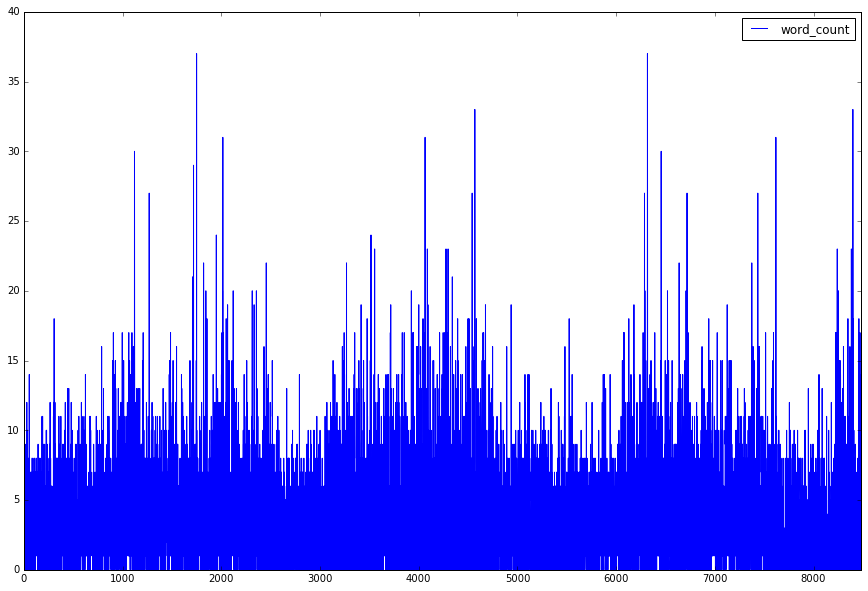

In [16]:
breadcrumbs.plot()

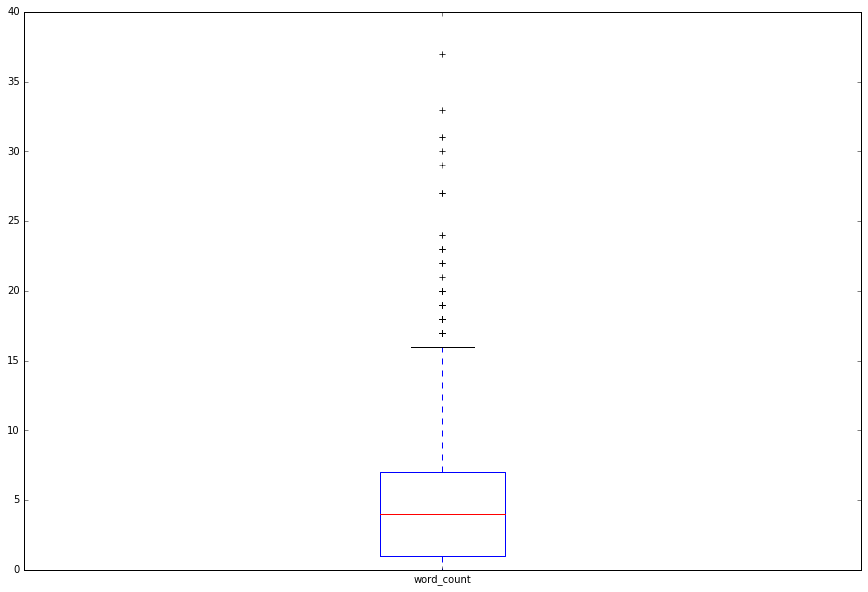

In [17]:
breadcrumbs.plot.box()

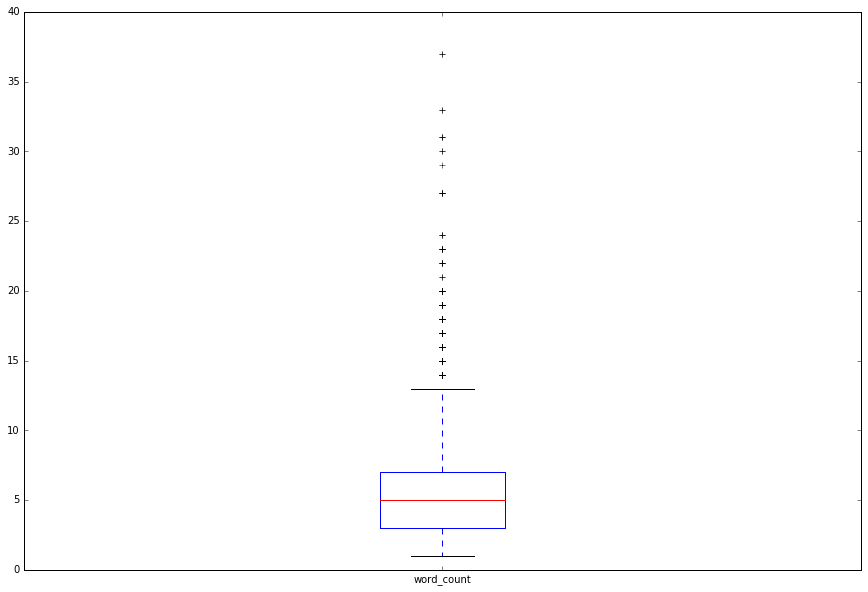

In [18]:
breadcrumbs[breadcrumbs['word_count'] != 0].plot.box()

# How many samples did we misclassify?
We call a product misclassified if the categoryNamePath_status say 'Incorrect'.

In [19]:
classification_data = spot_check_data[['categoryNamePath','categoryNamePath_status']].copy()

In [20]:
classification_data = classification_data.dropna()

In [21]:
clfn_spot_check = classification_data['categoryNamePath_status'].value_counts()
clfn_spot_check

Correct      5021
Incorrect    1595
Missed          7
Name: categoryNamePath_status, dtype: int64

In [22]:
# misclassified
clfn_spot_check['Incorrect']

1595

# What is probability of misclassifying a sample?

In [23]:
clfn_spot_check['Incorrect'] * 1.0 / (clfn_spot_check['Incorrect'] + clfn_spot_check['Correct'])

0.24108222490931075

# How many samples are misclassified when the breadcrumbs are invalid?
We assume that a breadcrumb is invalid when it is not correct.

In [24]:
breadcrumb_clfn_data = spot_check_data[['categoryNamePath','categoryNamePath_status', 
                                        'breadCrumbs', 'breadCrumbs_status']].copy()

In [25]:
breadcrumb_clfn_data[(breadcrumb_clfn_data.categoryNamePath_status == 'Incorrect') & (breadcrumb_clfn_data.breadCrumbs_status != 'Correct')].describe()

,categoryNamePath,categoryNamePath_status,breadCrumbs,breadCrumbs_status
count,694,694,198,694
unique,393,1,153,3
top,Additional,Incorrect,Sale > Tops,Notpresent
freq,42,694,5,406


# What is the probability that breadcrumbs are invalid?

In [26]:
breadcrumb_value_counts = breadcrumb_clfn_data['breadCrumbs_status'].value_counts()
breadcrumb_value_counts

Correct       4340
Notpresent    1245
Incorrect      747
Missed         291
Name: breadCrumbs_status, dtype: int64

In [27]:
clfn_value_counts = breadcrumb_clfn_data['categoryNamePath_status'].value_counts()
clfn_value_counts

Correct      5021
Incorrect    1595
Missed          7
Name: categoryNamePath_status, dtype: int64

In [28]:
probability_of_breadcrumb_invalid = 1 - (breadcrumb_value_counts['Correct'] * 1.0/breadcrumb_value_counts.sum())
probability_of_breadcrumb_invalid

0.3447078363279481

# What is the probability of correct category given that breadcrumb is invalid?

In [29]:
clfn_correct_breadcrumb_invalid_data = breadcrumb_clfn_data[(breadcrumb_clfn_data.categoryNamePath_status == 'Correct') 
                                                            & (breadcrumb_clfn_data.breadCrumbs_status != 'Correct')].copy()
clfn_correct_breadcrumb_invalid_count = clfn_correct_breadcrumb_invalid_data.count()['categoryNamePath']
clfn_correct_breadcrumb_invalid_count

1588

In [30]:
prob_clfn_correct_breadcrumb_invalid = clfn_correct_breadcrumb_invalid_count * 1.0 / (breadcrumb_value_counts.sum() - breadcrumb_value_counts['Correct'])
prob_clfn_correct_breadcrumb_invalid

0.69557599649583879

# Which toplevel category contains most invalid breadcrumbs?


In [31]:
def getTopCategory(categoryPath):
    return categoryPath.split(" >")[0]
clfn_correct_breadcrumb_invalid_data['topCategory'] = clfn_correct_breadcrumb_invalid_data['categoryNamePath'].apply(getTopCategory)

In [32]:
clfn_correct_breadcrumb_invalid_data

,categoryNamePath,categoryNamePath_status,breadCrumbs,breadCrumbs_status,topCategory
0,Clothing & Accessories > Novelty & Special Use...,Correct,NaN,Notpresent,Clothing & Accessories
1,"Patio, Lawn & Garden > Patio Furniture & Acces...",Correct,NaN,Notpresent,"Patio, Lawn & Garden"
2,"Patio, Lawn & Garden > Patio Furniture & Acces...",Correct,NaN,Notpresent,"Patio, Lawn & Garden"
7,Tools & Home Improvement > Building Supplies >...,Correct,NaN,Notpresent,Tools & Home Improvement
10,Sports & Outdoors > Clothing & Accessories > M...,Correct,NaN,Notpresent,Sports & Outdoors
11,Health & Personal Care > Medical Supplies & Eq...,Correct,NaN,Notpresent,Health & Personal Care
12,Tools & Home Improvement > Power & Hand Tools ...,Correct,NaN,Notpresent,Tools & Home Improvement
14,Toys & Games > Party Supplies > Balloons,Correct,NaN,Notpresent,Toys & Games
33,Office Products > Office Electronics > Electro...,Correct,NaN,Notpresent,Office Products
37,Grocery & Gourmet Food > Fresh Flowers & Live ...,Correct,NaN,Notpresent,Grocery & Gourmet Food


In [33]:
clfn_correct_breadcrumb_invalid_data['topCategory'].value_counts()

Clothing & Accessories      483
Shoes                       253
Health & Personal Care      203
Home & Kitchen              115
Sports & Outdoors           111
Jewelry                      80
Tools & Home Improvement     56
Electronics                  48
Patio, Lawn & Garden         35
Computers & Accessories      31
Grocery & Gourmet Food       26
Furniture                    23
Media                        23
Toys & Games                 17
Baby Products                16
Office Products              15
Additional                   11
Industrial & Scientific       9
Arts, Crafts & Sewing         9
Automotive                    8
Pet Supplies                  6
Video Games                   5
Musical Instruments           3
Software                      2
Name: topCategory, dtype: int64